# Основные функции визуализации и кластеризации

**Источник:** [https://scanpy-tutorials.readthedocs.io](https://scanpy-tutorials.readthedocs.io)

Для построения графиков мы будем использовать набор данных из 10x, содержащий 68 тыс клеток [PBMC](https://support.10xgenomics.com/single-cell-gene-expression/datasets). Scanpy, включает в свой дистрибутив сокращенную выборку этого набора данных, состоящую из предварительно обработанных данных 700 клеток и 765 высоковариабельных генов.

In [1]:
import scanpy as sc
import pandas as pd
from matplotlib.pyplot import rc_context

In [2]:
sc.set_figure_params(dpi=100, color_map = 'viridis_r')
sc.settings.verbosity = 1
sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.7.3 pandas==1.4.2 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.3 louvain==0.8.0 pynndescent==0.5.8


### Загрузка датасета

In [3]:
pbmc = sc.datasets.pbmc68k_reduced()
pbmc

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

### Визуализация уровня экспрессии генов и других характеристик

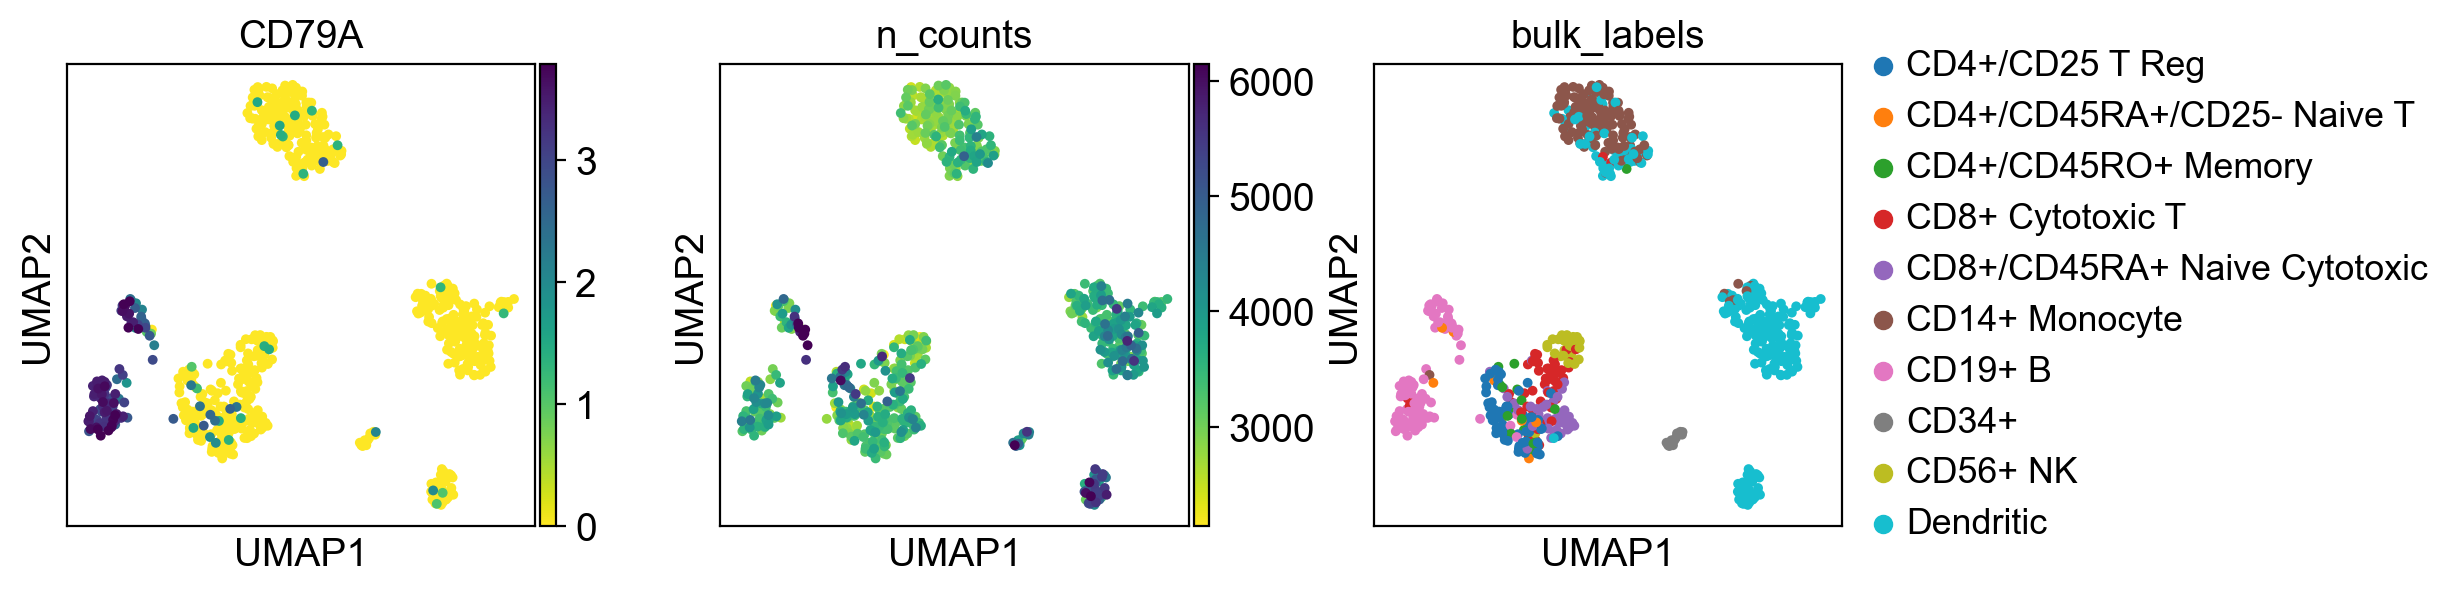

In [4]:
with rc_context({'figure.figsize': (3, 3)}):
    sc.pl.umap(pbmc, color=['CD79A', 'n_counts', 'bulk_labels'], s=50, frameon=True, ncols=4, vmax='p99') 

In [5]:
# находим кластеры с помощью метода leiden и сохраняем результат в нашу структуру под именем `clusters`
sc.tl.leiden(pbmc, key_added='clusters', resolution=0.5)

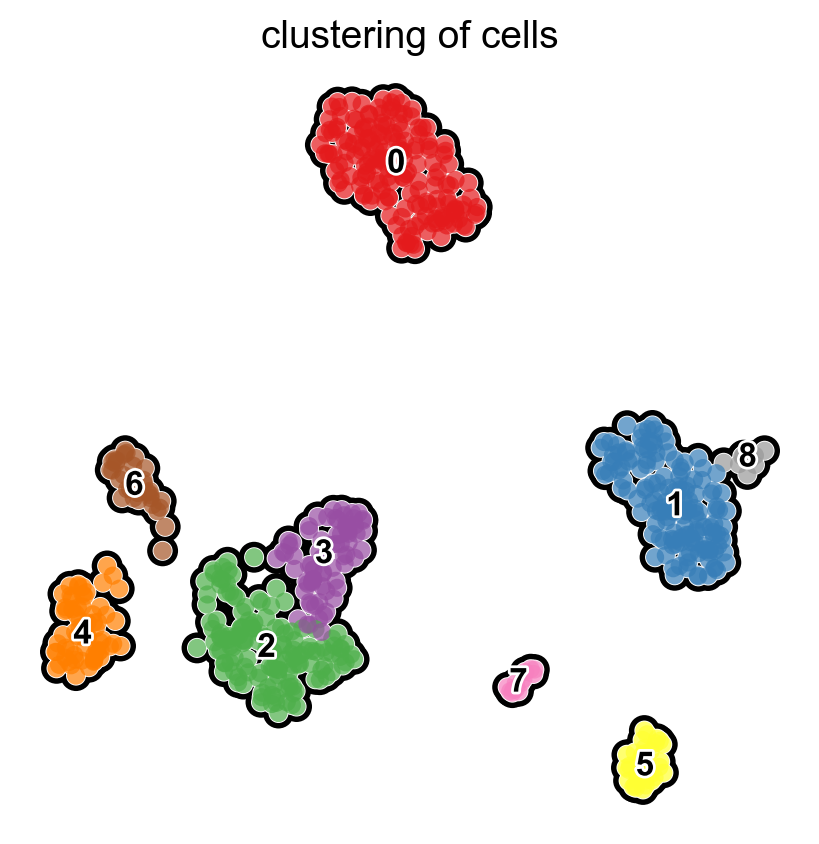

In [6]:
with rc_context({'figure.figsize': (5, 5)}):
    sc.pl.umap(pbmc, color='clusters', add_outline=True, legend_loc='on data', 
               legend_fontsize=12, legend_fontoutline=2,frameon=False,  
               title='clustering of cells', palette='Set1') 

## Идентификация кластеров на основе известных маркерных генов

In [7]:
marker_genes_dict = {
    'B-cell': ['CD79A', 'MS4A1'],     
    'Dendritic': ['FCER1A', 'CST3'],    
    'Monocytes': ['FCGR3A'],
    'NK': ['GNLY', 'NKG7'],
    'Other': ['IGLL1'],
    'Plasma': ['IGJ'],
    'T-cell': ['CD3D'],
}

### dotplot

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


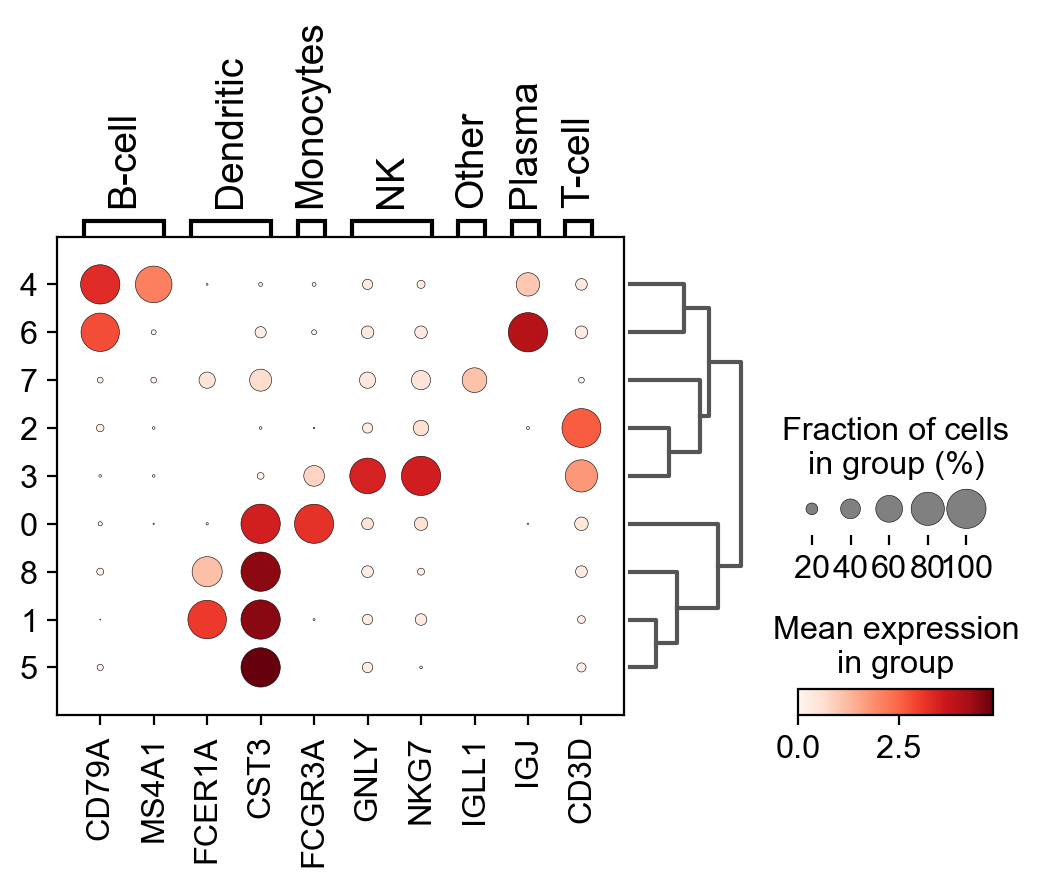

In [8]:
sc.pl.dotplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True)

In [9]:
# создаем словарь для сопоставления кластеров с метками аннотации
cluster2annotation = {
     '0': 'Monocytes',
     '1': 'Dendritic',
     '2': 'T-cell',
     '3': 'NK',
     '4': 'B-cell',
     '5': 'Dendritic',
     '6': 'Plasma',
     '7': 'Other',
     '8': 'Dendritic',
}

# добавляем новый столбец `cell type`, сопоставив кластеры с аннотацией с помощью функции pandas `map`.
pbmc.obs['cell type'] = pbmc.obs['clusters'].map(cluster2annotation).astype('category')

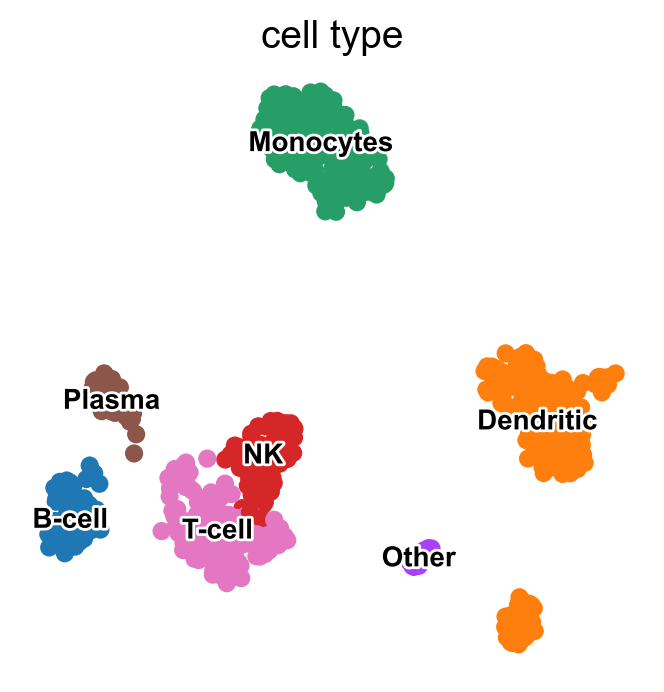

In [37]:
sc.pl.umap(pbmc, color='cell type', legend_loc='on data',
           frameon=False, legend_fontsize=10, legend_fontoutline=2)

### violin plot

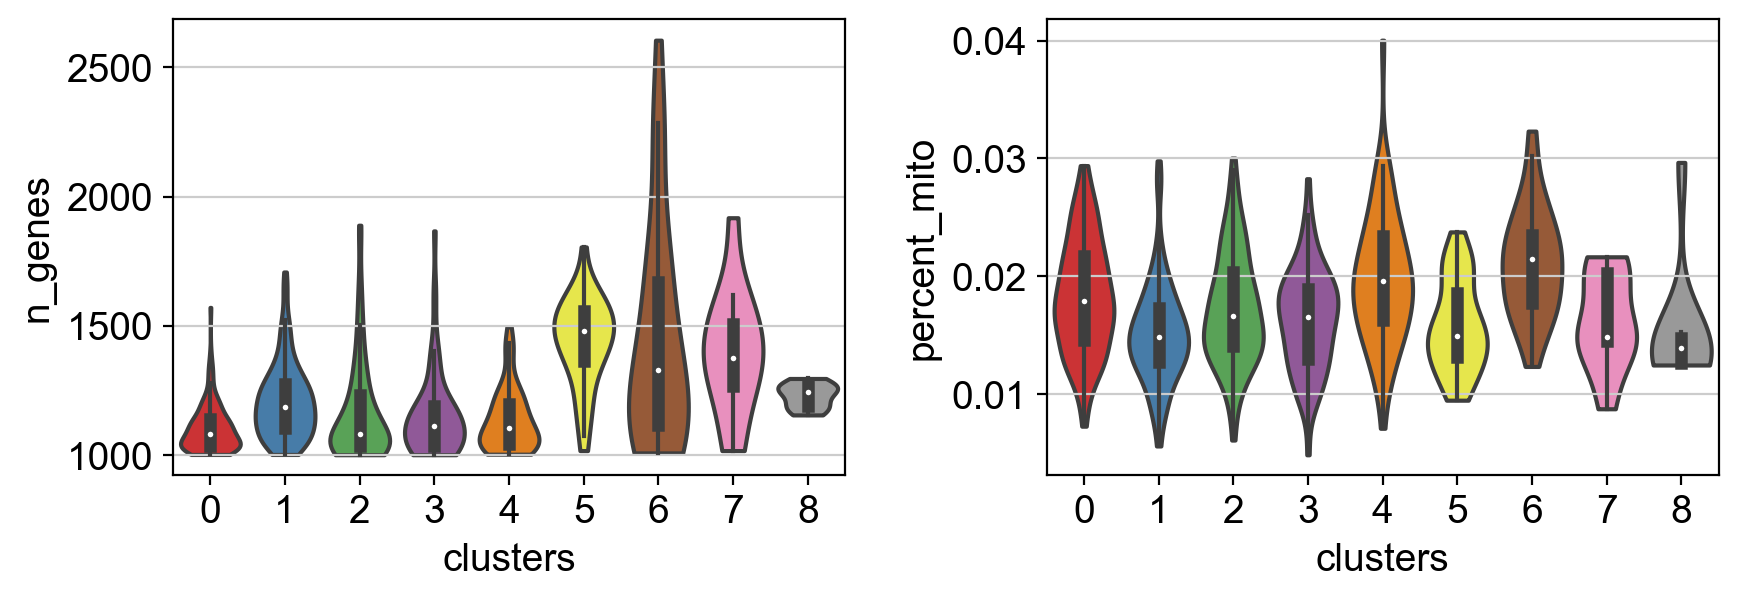

In [39]:
with rc_context({'figure.figsize': (4.5, 3)}):
    sc.pl.violin(pbmc, ['n_genes', 'percent_mito'], groupby='clusters', stripplot=False, inner='box')

### stacked-violin plot

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


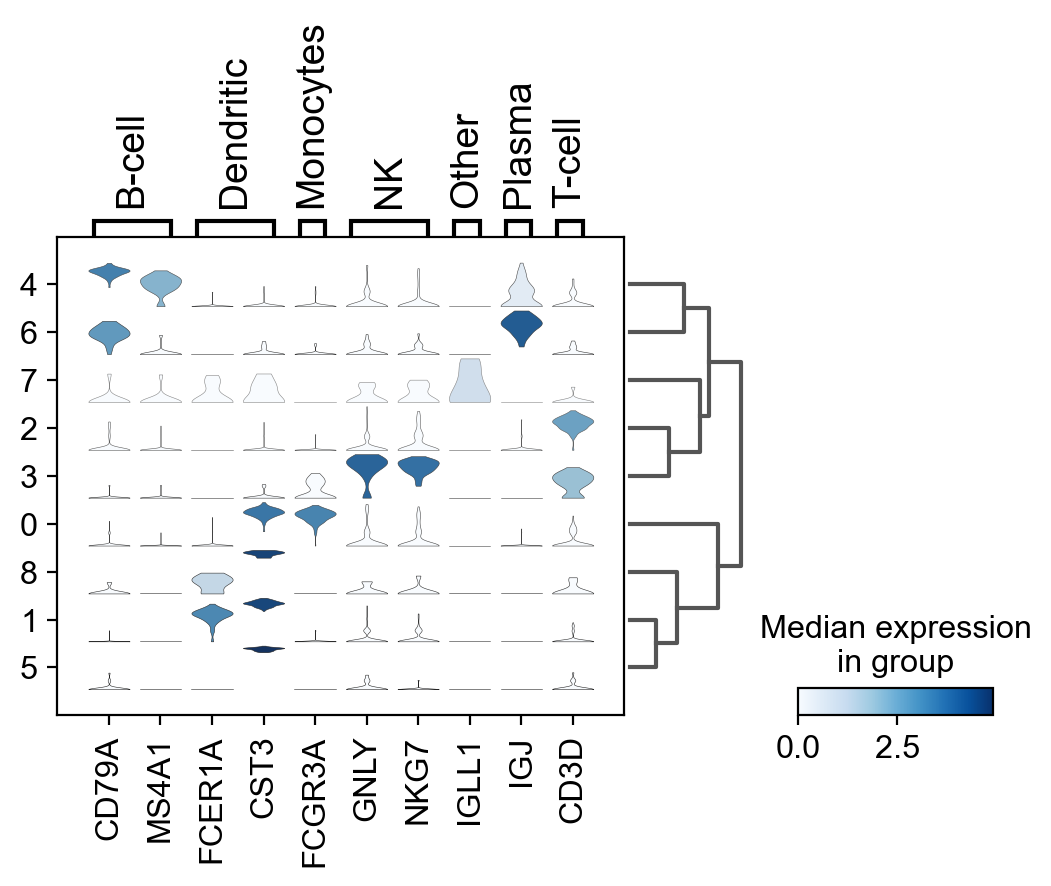

In [14]:
ax = sc.pl.stacked_violin(pbmc, marker_genes_dict, groupby='clusters', swap_axes=False, dendrogram=True)

### matrixplot

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


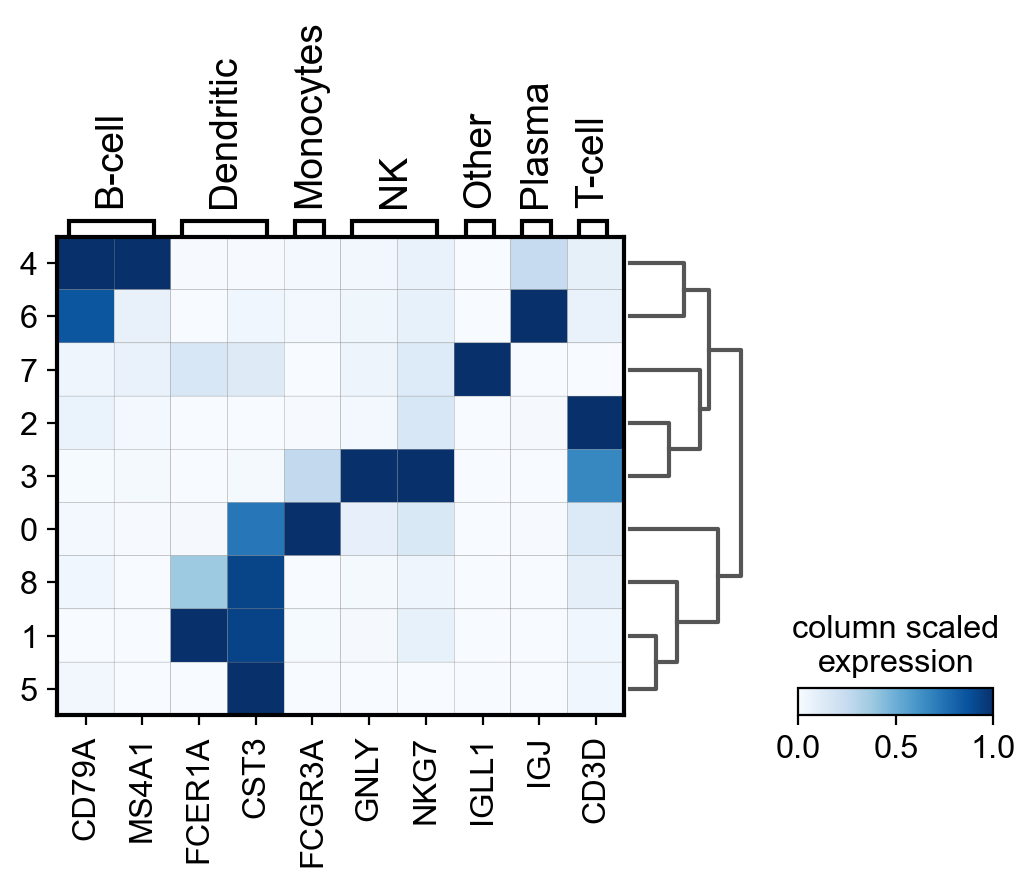

In [40]:
sc.pl.matrixplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

In [41]:
# scale and store results in layer
pbmc.layers['scaled'] = sc.pp.scale(pbmc, copy=True).X

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


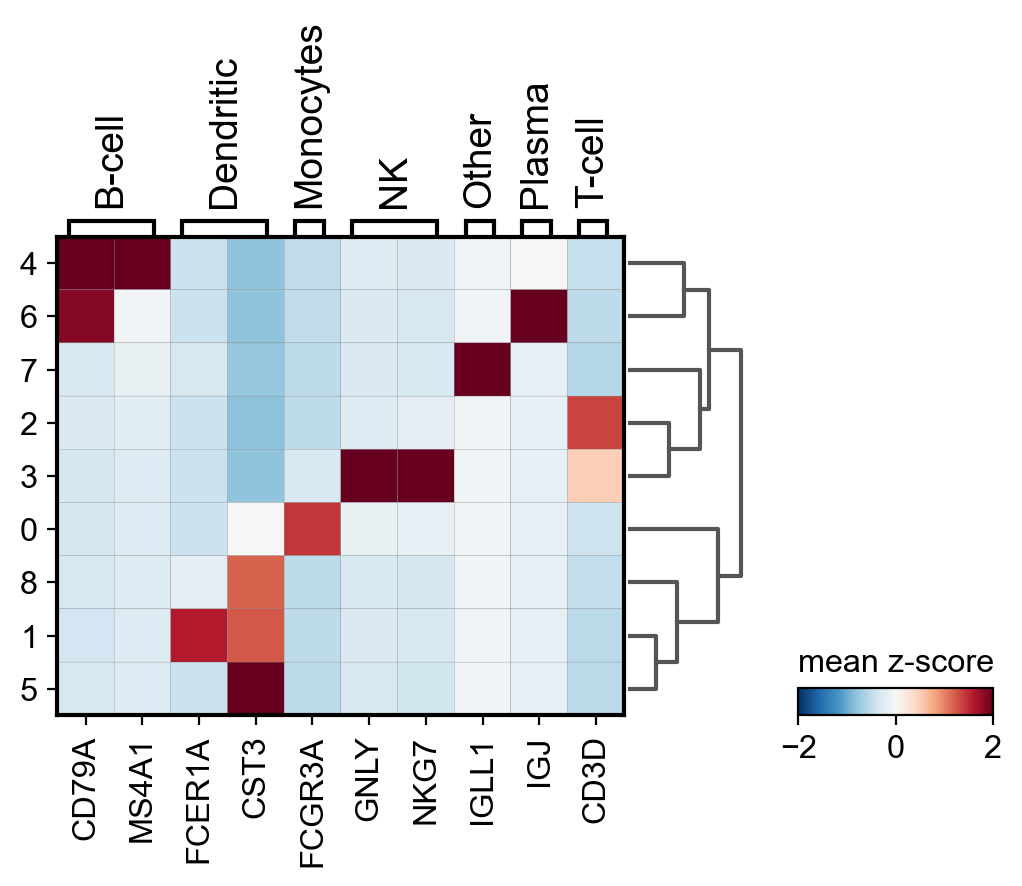

In [42]:
sc.pl.matrixplot(pbmc, marker_genes_dict, 'clusters', dendrogram=True, 
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')

## Heatmaps

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


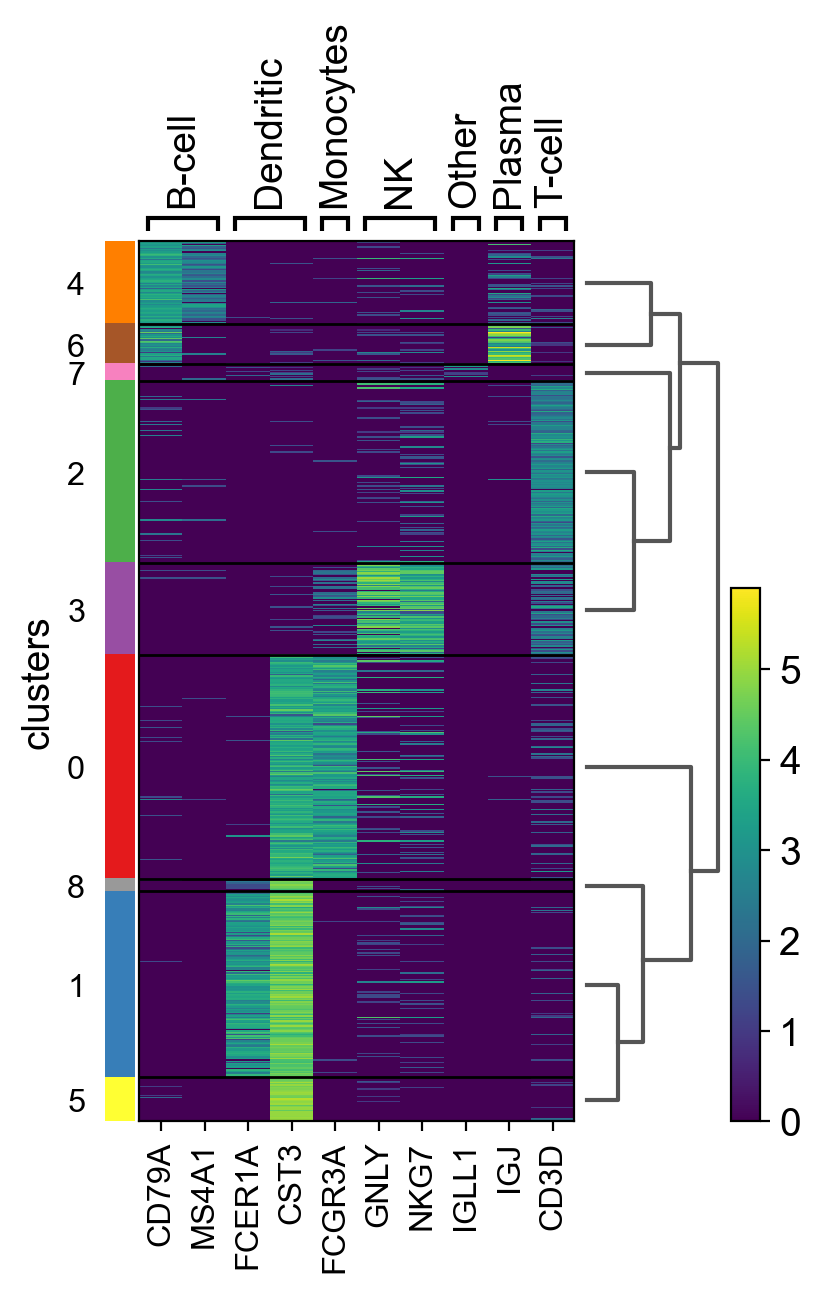

In [43]:
ax = sc.pl.heatmap(pbmc, marker_genes_dict, groupby='clusters', cmap='viridis', dendrogram=True)

## Tracksplot

categories: 0, 1, 2, etc.
var_group_labels: B-cell, Dendritic, Monocytes, etc.


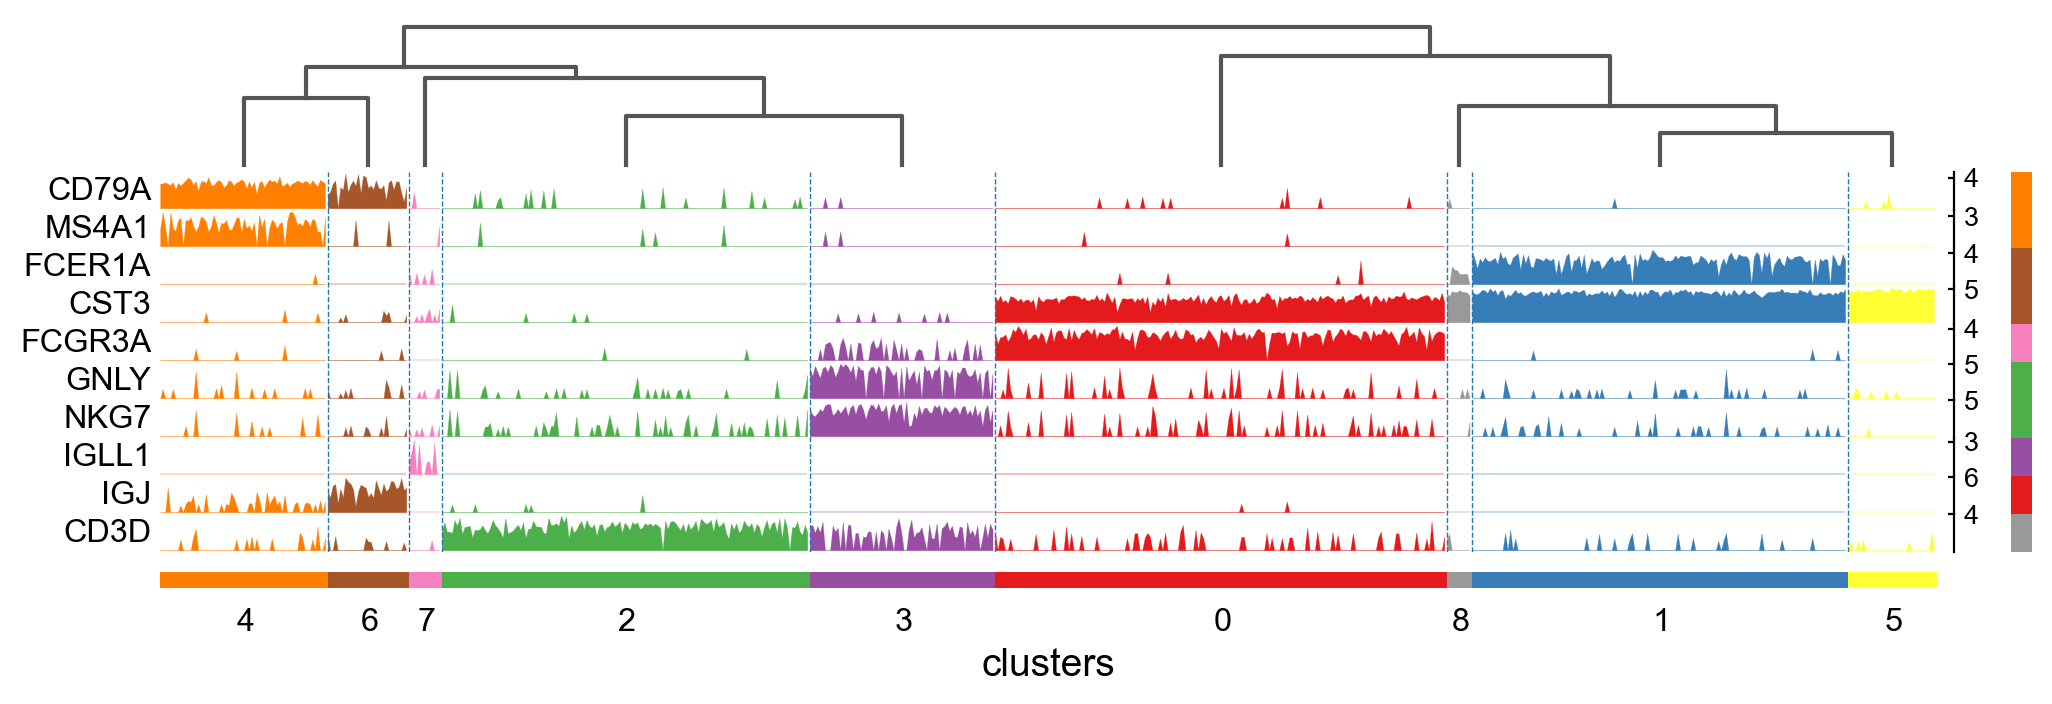

In [44]:
ax = sc.pl.tracksplot(pbmc, marker_genes_dict, groupby='clusters', dendrogram=True)

## Визуализация дифференциальной экспрессии генов

In [45]:
sc.tl.rank_genes_groups(pbmc, groupby='clusters', method='wilcoxon')

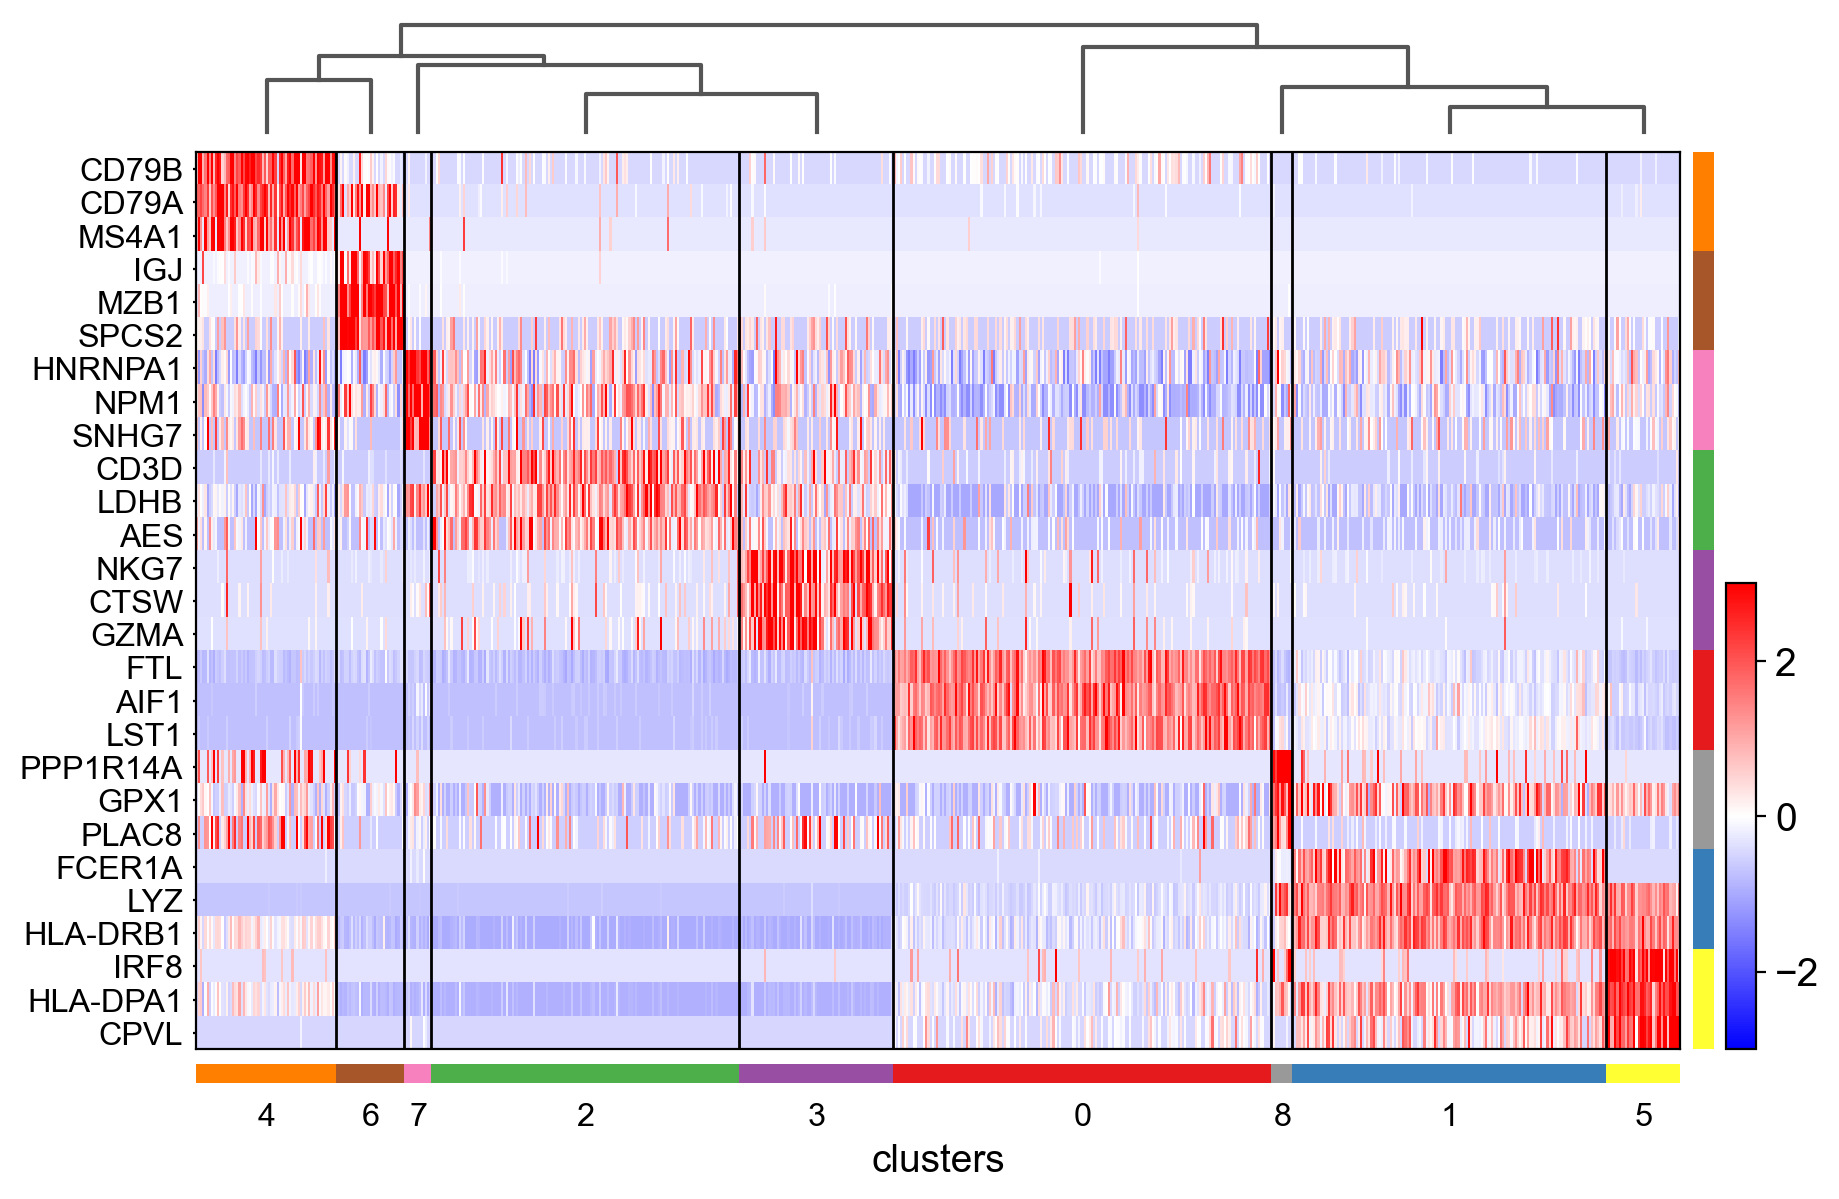

In [46]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, use_raw=False, swap_axes=True, vmin=-3, vmax=3, cmap='bwr', layer='scaled', figsize=(10,7), show=False);